In [68]:
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import json

# Set plot style
sns.set(style='whitegrid')


In [69]:
import pandas as pd
import json

# Load file
file_path = "/content/compoundV2_transactions_ethereum_chunk_32.json"
with open(file_path, "r") as f:
    data = json.load(f)

# Load
deposits = pd.json_normalize(data["deposits"], sep="_")

# Flatten relevant fields
deposits = deposits.rename(columns={
    "account_id": "wallet",
    "asset_symbol": "asset",
    "amountUSD": "amount_usd",
    "timestamp": "timestamp"
})

# Convert timestamp to datetime
deposits["timestamp"] = pd.to_datetime(deposits["timestamp"].astype(int), unit="s")
deposits["amount_usd"] = deposits["amount_usd"].astype(float)


deposits.head()


,amount,amount_usd,hash,id,timestamp,wallet,asset_id,asset
0,121584836262,121584.836262,0xac9106defbbcbe7ff52edc630bc7a029afde8557a932...,0xac9106defbbcbe7ff52edc630bc7a029afde8557a932...,2020-10-14 02:24:03,0xe8981aa72d495aa71681c41159c1ec8746ee3fbd,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC
1,800305277000000000000,2681.021878,0xb9a9d51d5adf67b30178cb50373e1068f7a3553b355e...,0xb9a9d51d5adf67b30178cb50373e1068f7a3553b355e...,2020-10-14 02:24:26,0x80d53979b8ee634dc5d2f3af1f22f5247f00a51a,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI
2,197606216787489765492,661.980629,0xd666a51688505c2bb595ec4f0c41401e12a969fab113...,0xd666a51688505c2bb595ec4f0c41401e12a969fab113...,2020-10-14 02:24:26,0x314426339db1f662637f9f79aa1274a9ad1e3405,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI
3,10311076000000000,3.955432,0x706913eda84bf7018ba135ebd29e20b4e83e2e4dc568...,0x706913eda84bf7018ba135ebd29e20b4e83e2e4dc568...,2020-10-14 02:31:00,0x64f54c5258936ab1228b013ae110188996d400b9,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH
4,199927478,199.927478,0x2b1947d6f3df1664963116b7dbc5dfbbcc15ab825f94...,0x2b1947d6f3df1664963116b7dbc5dfbbcc15ab825f94...,2020-10-14 02:31:34,0xef492b2d863b4e68330b4ed0b39708d3846b3420,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC


In [114]:
import pandas as pd
import json

# Load file
file_path = "/content/compoundV2_transactions_ethereum_chunk_1.json"  # replace with correct path
with open(file_path, "r") as f:
    data = json.load(f)

# Load from 'deposits' key
deposits1 = pd.json_normalize(data["deposits"], sep="_")

# Flatten relevant fields
deposits1 = deposits1.rename(columns={
    "account_id": "wallet",
    "asset_symbol": "asset",
    "amountUSD": "amount_usd",
    "timestamp": "timestamp"
})

# Convert timestamp to datetime
deposits1["timestamp"] = pd.to_datetime(deposits1["timestamp"].astype(int), unit="s")
deposits1["amount_usd"] = deposits1["amount_usd"].astype(float)

# Preview
deposits1.head()


,amount,amount_usd,hash,id,timestamp,wallet,asset_id,asset
0,293025918296213842664,294.098362,0xc07a5d8ca08cd1e01a8324d6235da1df7d58720500ce...,0xc07a5d8ca08cd1e01a8324d6235da1df7d58720500ce...,2019-07-03 22:22:36,0x9e21d7f1d1878be7e4e5f0c8750b09b09414be44,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI
1,233591042300947866741,236.936134,0x11734b04bcd03f2cde375e4d13fafab9d17eef3d7aef...,0x11734b04bcd03f2cde375e4d13fafab9d17eef3d7aef...,2019-07-03 22:29:50,0x9e21d7f1d1878be7e4e5f0c8750b09b09414be44,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI
2,493866984581287182336,498.044019,0xe611412cb9164421a95070e96b041ee12fca19a04aaa...,0xe611412cb9164421a95070e96b041ee12fca19a04aaa...,2019-07-03 22:30:00,0x3eab4037a2e7f4d4d0946c091fe135838221f2b6,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI
3,300000000,300.000000,0xcb7f5145eb6779cd18789251094f20587e357adb0f6e...,0xcb7f5145eb6779cd18789251094f20587e357adb0f6e...,2019-07-03 22:30:19,0x794ad3af58b56522b80aa7e9bc04f042c55d5b2f,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC
4,476901862957734543875,476.020148,0xc0809ef3102b874c7d55aafb6abddf8b8f5cbe743197...,0xc0809ef3102b874c7d55aafb6abddf8b8f5cbe743197...,2019-07-03 22:36:58,0x9e21d7f1d1878be7e4e5f0c8750b09b09414be44,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI


In [115]:
import pandas as pd
import json

# Load file
file_path = "/content/compoundV2_transactions_ethereum_chunk_0.json"  # replace with correct path
with open(file_path, "r") as f:
    data = json.load(f)

# Load from 'deposits' key
deposits2 = pd.json_normalize(data["deposits"], sep="_")

# Flatten relevant fields
deposits2 = deposits2.rename(columns={
    "account_id": "wallet",
    "asset_symbol": "asset",
    "amountUSD": "amount_usd",
    "timestamp": "timestamp"
})

# Convert timestamp to datetime
deposits2["timestamp"] = pd.to_datetime(deposits2["timestamp"].astype(int), unit="s")
deposits2["amount_usd"] = deposits2["amount_usd"].astype(float)

# Preview
deposits1.head()


,amount,amount_usd,hash,id,timestamp,wallet,asset_id,asset
0,293025918296213842664,294.098362,0xc07a5d8ca08cd1e01a8324d6235da1df7d58720500ce...,0xc07a5d8ca08cd1e01a8324d6235da1df7d58720500ce...,2019-07-03 22:22:36,0x9e21d7f1d1878be7e4e5f0c8750b09b09414be44,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI
1,233591042300947866741,236.936134,0x11734b04bcd03f2cde375e4d13fafab9d17eef3d7aef...,0x11734b04bcd03f2cde375e4d13fafab9d17eef3d7aef...,2019-07-03 22:29:50,0x9e21d7f1d1878be7e4e5f0c8750b09b09414be44,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI
2,493866984581287182336,498.044019,0xe611412cb9164421a95070e96b041ee12fca19a04aaa...,0xe611412cb9164421a95070e96b041ee12fca19a04aaa...,2019-07-03 22:30:00,0x3eab4037a2e7f4d4d0946c091fe135838221f2b6,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI
3,300000000,300.000000,0xcb7f5145eb6779cd18789251094f20587e357adb0f6e...,0xcb7f5145eb6779cd18789251094f20587e357adb0f6e...,2019-07-03 22:30:19,0x794ad3af58b56522b80aa7e9bc04f042c55d5b2f,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC
4,476901862957734543875,476.020148,0xc0809ef3102b874c7d55aafb6abddf8b8f5cbe743197...,0xc0809ef3102b874c7d55aafb6abddf8b8f5cbe743197...,2019-07-03 22:36:58,0x9e21d7f1d1878be7e4e5f0c8750b09b09414be44,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI


In [116]:
# prompt: merger the deposits,desposits1,deposits2

import pandas as pd
# Concatenate the DataFrames
merged_deposits = pd.concat([deposits, deposits1, deposits2], ignore_index=True)

# Display the first few rows of the merged DataFrame
merged_deposits.head()


,amount,amount_usd,hash,id,timestamp,wallet,asset_id,asset
0,121584836262,121584.836262,0xac9106defbbcbe7ff52edc630bc7a029afde8557a932...,0xac9106defbbcbe7ff52edc630bc7a029afde8557a932...,2020-10-14 02:24:03,0xe8981aa72d495aa71681c41159c1ec8746ee3fbd,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC
1,800305277000000000000,2681.021878,0xb9a9d51d5adf67b30178cb50373e1068f7a3553b355e...,0xb9a9d51d5adf67b30178cb50373e1068f7a3553b355e...,2020-10-14 02:24:26,0x80d53979b8ee634dc5d2f3af1f22f5247f00a51a,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI
2,197606216787489765492,661.980629,0xd666a51688505c2bb595ec4f0c41401e12a969fab113...,0xd666a51688505c2bb595ec4f0c41401e12a969fab113...,2020-10-14 02:24:26,0x314426339db1f662637f9f79aa1274a9ad1e3405,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI
3,10311076000000000,3.955432,0x706913eda84bf7018ba135ebd29e20b4e83e2e4dc568...,0x706913eda84bf7018ba135ebd29e20b4e83e2e4dc568...,2020-10-14 02:31:00,0x64f54c5258936ab1228b013ae110188996d400b9,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH
4,199927478,199.927478,0x2b1947d6f3df1664963116b7dbc5dfbbcc15ab825f94...,0x2b1947d6f3df1664963116b7dbc5dfbbcc15ab825f94...,2020-10-14 02:31:34,0xef492b2d863b4e68330b4ed0b39708d3846b3420,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC


In [117]:
merged_deposits.shape

(30000, 8)

In [118]:
print(merged_deposits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   amount      30000 non-null  object        
 1   amount_usd  30000 non-null  float64       
 2   hash        30000 non-null  object        
 3   id          30000 non-null  object        
 4   timestamp   30000 non-null  datetime64[ns]
 5   wallet      30000 non-null  object        
 6   asset_id    30000 non-null  object        
 7   asset       30000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 1.8+ MB
None


In [119]:
print(merged_deposits.describe())

         amount_usd                   timestamp
count  3.000000e+04                       30000
mean   1.372256e+04  2019-12-05 05:59:39.479200
min    0.000000e+00         2019-05-07 01:41:22
25%    3.000000e+00         2019-06-24 18:33:27
50%    7.564199e+01  2019-07-18 22:00:23.500000
75%    1.081753e+03  2020-10-15 07:10:41.500000
max    3.083103e+07         2020-10-15 23:08:00
std    2.739938e+05                         NaN


In [120]:
print("Unique wallets:", merged_deposits["wallet"].nunique())


Unique wallets: 14508


In [121]:
print("Top 5 assets:",merged_deposits["asset"].value_counts().head())

Top 5 assets: asset
DAI     11631
USDC    10198
ETH      6118
BAT       772
ZRX       471
Name: count, dtype: int64


## Total and Average Deposit per Wallet

In [122]:
wallet_summary = merged_deposits.groupby("wallet").agg(
    total_deposit_usd=("amount_usd", "sum"),
    avg_deposit_usd=("amount_usd", "mean"),
    num_deposits=("amount_usd", "count"),
    first_tx=("timestamp", "min"),
    last_tx=("timestamp", "max")
).reset_index()

# Transaction activity period
wallet_summary["active_days"] = (wallet_summary["last_tx"] - wallet_summary["first_tx"]).dt.days + 1

wallet_summary.head()


,wallet,total_deposit_usd,avg_deposit_usd,num_deposits,first_tx,last_tx,active_days
0,0x000000aaee6a496aaf7b7452518781786313400f,691534.883117,10976.744176,63,2019-07-02 10:53:55,2019-07-26 21:57:11,25
1,0x00000a6bbb35ea3f6f8dbc94801738f490c30a8d,6.063779,3.031889,2,2019-06-03 23:56:55,2019-06-06 20:25:14,3
2,0x0006e4548aed4502ec8c844567840ce6ef1013f5,236378.577102,9455.143084,25,2019-05-15 11:32:11,2019-07-26 16:45:57,73
3,0x000be263b3ceb55d22ed9b40d7619f62c4862c80,81612.530248,4534.029458,18,2019-05-27 02:41:05,2019-07-26 17:21:57,61
4,0x00120ec799017bbab1049174ac3cd706260effc4,502.961894,502.961894,1,2019-07-08 19:46:37,2019-07-08 19:46:37,1


In [123]:
wallet_summary['num_deposits'].value_counts()

,count
num_deposits,
1,11060
2,1422
3,627
4,371
5,236
...,...
254,1
34,1
84,1


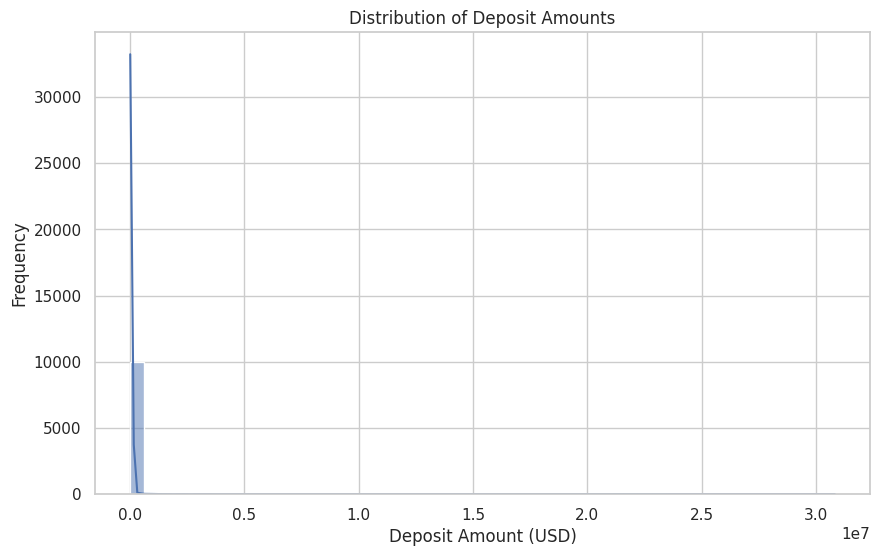

In [124]:

# 1. Distribution of Deposit Amounts
plt.figure(figsize=(10, 6))
sns.histplot(deposits['amount_usd'], bins=50, kde=True)
plt.title('Distribution of Deposit Amounts')
plt.xlabel('Deposit Amount (USD)')
plt.ylabel('Frequency')
plt.show()



<ipython-input-125-7f9a09820d64>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='timestamp', y='amount_usd', data=deposits, estimator='sum', ci=None)


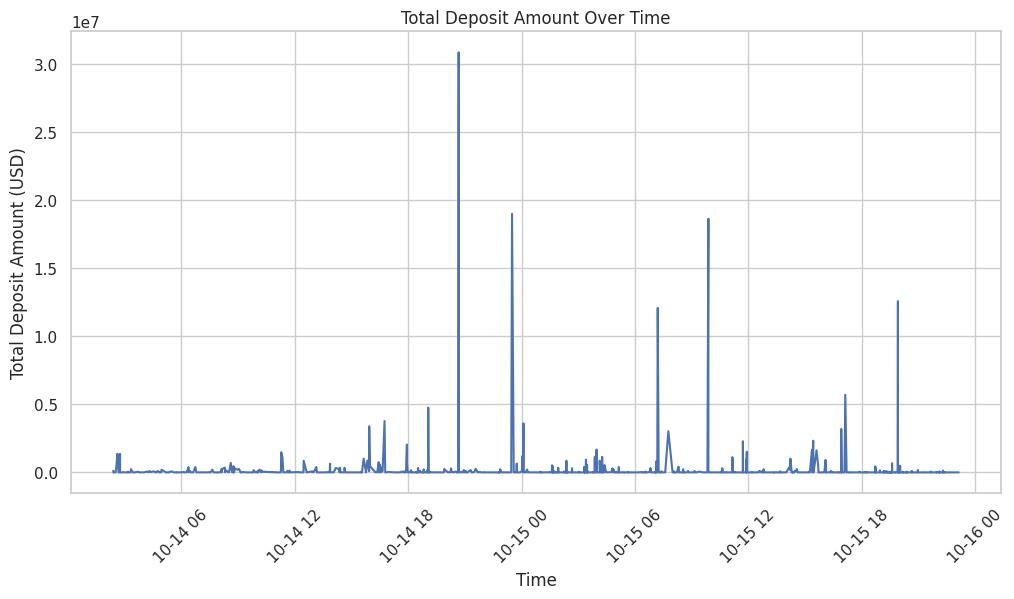

In [125]:
# 2. Deposit Amount over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='amount_usd', data=deposits, estimator='sum', ci=None)
plt.title('Total Deposit Amount Over Time')
plt.xlabel('Time')
plt.ylabel('Total Deposit Amount (USD)')
plt.xticks(rotation=45)
plt.show()



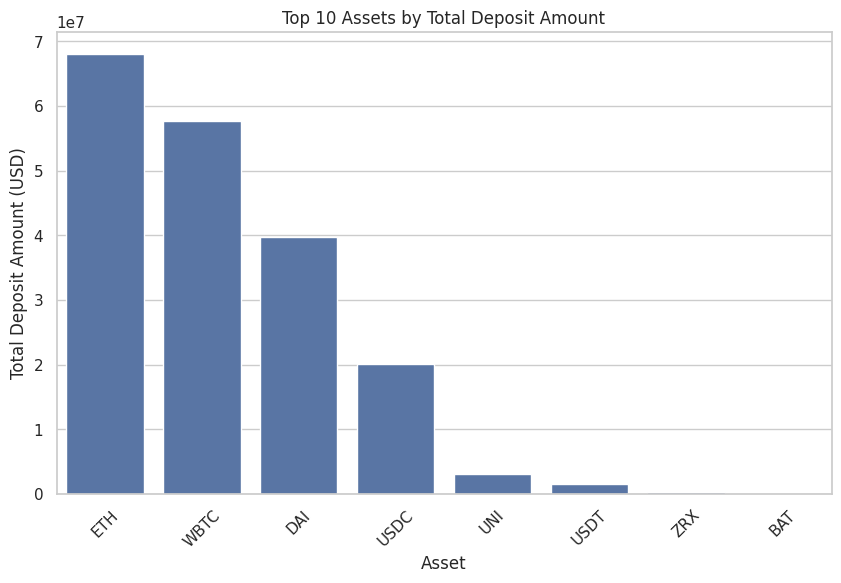

In [126]:
# 3. Top Assets by Deposit Amount
top_assets = deposits.groupby('asset')['amount_usd'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_assets.index, y=top_assets.values)
plt.title('Top 10 Assets by Total Deposit Amount')
plt.xlabel('Asset')
plt.ylabel('Total Deposit Amount (USD)')
plt.xticks(rotation=45)
plt.show()


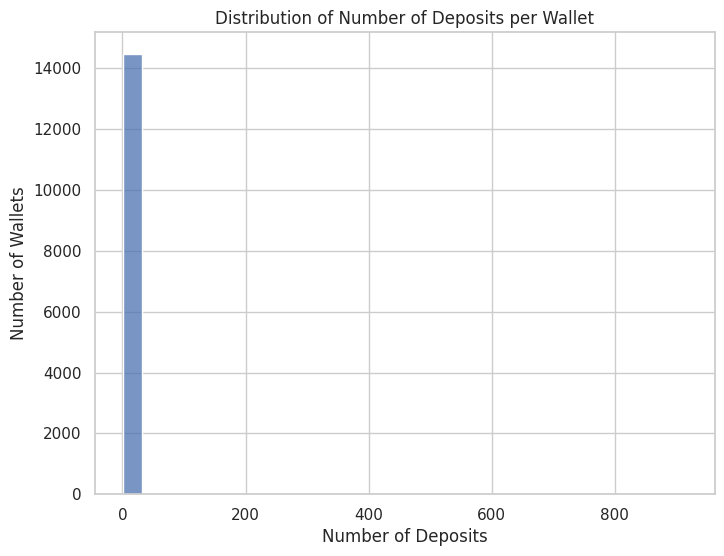

In [127]:

# 4. Number of Deposits per Wallet
plt.figure(figsize=(8, 6))
sns.histplot(wallet_summary['num_deposits'], bins=30)
plt.title('Distribution of Number of Deposits per Wallet')
plt.xlabel('Number of Deposits')
plt.ylabel('Number of Wallets')
plt.show()



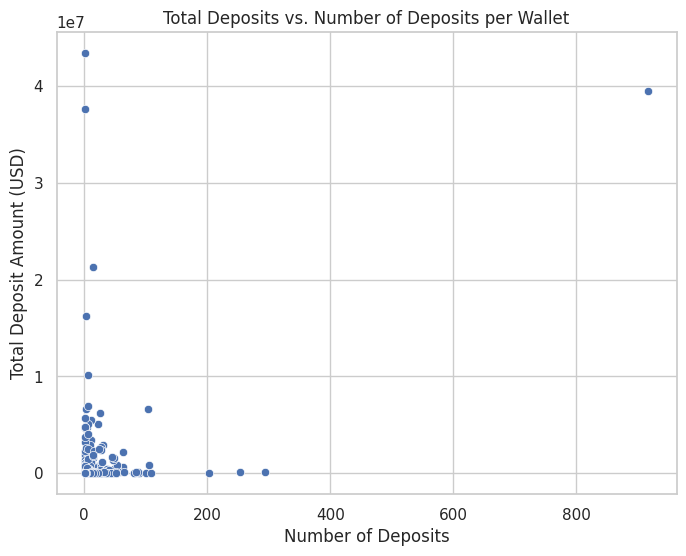

In [129]:

# 5. Relationship between Total Deposits and Number of Deposits
plt.figure(figsize=(8, 6))
sns.scatterplot(x='num_deposits', y='total_deposit_usd', data=wallet_summary)
plt.title('Total Deposits vs. Number of Deposits per Wallet')
plt.xlabel('Number of Deposits')
plt.ylabel('Total Deposit Amount (USD)')
plt.show()



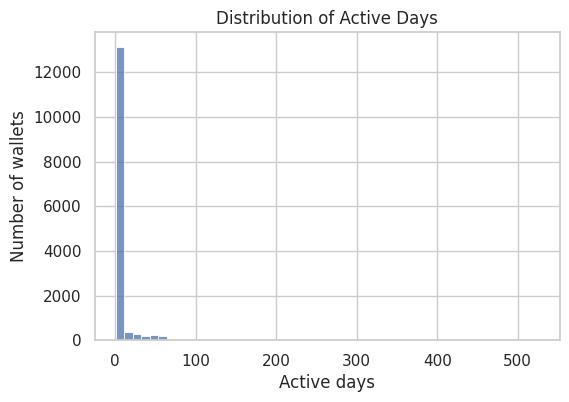

In [130]:
# 6. Active Days distribution
plt.figure(figsize=(6,4))
sns.histplot(wallet_summary['active_days'], bins=50)
plt.title("Distribution of Active Days")
plt.xlabel("Active days")
plt.ylabel("Number of wallets")
plt.show()

## Feature Engineering

In [131]:
wallet_summary["deposit_freq"] = wallet_summary["num_deposits"] / wallet_summary["active_days"]
wallet_summary["deposit_consistency"] = wallet_summary["avg_deposit_usd"] / wallet_summary["total_deposit_usd"]
wallet_summary.fillna(0, inplace=True)  # in case of divide-by-zero


In [132]:

# Define criteria for "good" and "bad" wallet behavior based on features
def categorize_wallet(row):
    """Categorizes a wallet as 'good', 'bad', or 'neutral' based on defined criteria."""

    # Example criteria (customize these based on your analysis and goals)
    if row['total_deposit_usd'] > 1000 and row['num_deposits'] > 10 and row['active_days'] > 30 :  # Good wallet: High total deposits, frequent transactions
        return 'good'
    elif row['total_deposit_usd'] < 100 and row['num_deposits'] < 5 and row['active_days'] < 7:  # Bad wallet: Low total deposits, infrequent transactions
        return 'bad'
    else:
        return 'neutral'  # Neutral for other wallets


# Apply the categorization function to create a new 'wallet_category' column
wallet_summary['wallet_category'] = wallet_summary.apply(categorize_wallet, axis=1)

# Analyze the distribution of wallet categories
print(wallet_summary['wallet_category'].value_counts())

# Further analysis or actions based on the categories
# For example, you might want to investigate wallets in the "bad" category further,
# or use this information to train a classification model.

# Example: Display wallets categorized as "bad"
bad_wallets = wallet_summary[wallet_summary['wallet_category'] == 'bad']
print("\nBad Wallets:")
bad_wallets


wallet_category
bad        10267
neutral     4073
good         168
Name: count, dtype: int64

Bad Wallets:


,wallet,total_deposit_usd,avg_deposit_usd,num_deposits,first_tx,last_tx,active_days,deposit_freq,deposit_consistency,wallet_category
1,0x00000a6bbb35ea3f6f8dbc94801738f490c30a8d,6.063779,3.031889,2,2019-06-03 23:56:55,2019-06-06 20:25:14,3,0.666667,0.5,bad
5,0x0018bc4da484e21d68c6338115a54ef11da4ea78,3.000000,3.000000,1,2020-10-15 19:13:03,2020-10-15 19:13:03,1,1.000000,1.0,bad
6,0x002196219a2bf6fa47e9ac28713c143c2746f297,3.000000,3.000000,1,2020-10-15 16:35:31,2020-10-15 16:35:31,1,1.000000,1.0,bad
7,0x00279a699b44e4952db52ee8152da13e42219a27,3.000000,3.000000,1,2020-10-15 04:49:38,2020-10-15 04:49:38,1,1.000000,1.0,bad
10,0x0029fe44f81d04897d0d5780c4f9a70ede89af54,3.000000,3.000000,1,2020-10-15 18:54:10,2020-10-15 18:54:10,1,1.000000,1.0,bad
...,...,...,...,...,...,...,...,...,...,...
14499,0xffedcdac8ba51be3101607fab1b44462c3015fb0,20.240187,20.240187,1,2019-07-19 17:43:09,2019-07-19 17:43:09,1,1.000000,1.0,bad
14500,0xfff57cb2901a33221121a7ba1c0c56683541b257,3.000000,3.000000,1,2020-10-15 22:37:38,2020-10-15 22:37:38,1,1.000000,1.0,bad
14505,0xfffae4a2f71df8f9be0ab1426f3ae2b28ca39fe4,3.651693,3.651693,1,2020-10-15 15:52:19,2020-10-15 15:52:19,1,1.000000,1.0,bad
14506,0xfffb099a71f8f6fe5d0d7448e367d40063e0e24d,3.000000,3.000000,1,2020-10-15 05:48:00,2020-10-15 05:48:00,1,1.000000,1.0,bad


In [134]:
wallet_summary.head()

,wallet,total_deposit_usd,avg_deposit_usd,num_deposits,first_tx,last_tx,active_days,deposit_freq,deposit_consistency,wallet_category
0,0x000000aaee6a496aaf7b7452518781786313400f,691534.883117,10976.744176,63,2019-07-02 10:53:55,2019-07-26 21:57:11,25,2.520000,0.015873,neutral
1,0x00000a6bbb35ea3f6f8dbc94801738f490c30a8d,6.063779,3.031889,2,2019-06-03 23:56:55,2019-06-06 20:25:14,3,0.666667,0.500000,bad
2,0x0006e4548aed4502ec8c844567840ce6ef1013f5,236378.577102,9455.143084,25,2019-05-15 11:32:11,2019-07-26 16:45:57,73,0.342466,0.040000,good
3,0x000be263b3ceb55d22ed9b40d7619f62c4862c80,81612.530248,4534.029458,18,2019-05-27 02:41:05,2019-07-26 17:21:57,61,0.295082,0.055556,good
4,0x00120ec799017bbab1049174ac3cd706260effc4,502.961894,502.961894,1,2019-07-08 19:46:37,2019-07-08 19:46:37,1,1.000000,1.000000,neutral


In [135]:
wallet_summary.describe()

,total_deposit_usd,avg_deposit_usd,num_deposits,first_tx,last_tx,active_days,deposit_freq,deposit_consistency
count,1.450800e+04,1.450800e+04,14508.000000,14508,14508,14508.000000,14508.000000,14508.000000
mean,2.837585e+04,8.869725e+03,2.067825,2020-04-23 11:20:57.454714368,2020-04-28 08:39:09.383857152,5.795837,1.075943,0.841203
min,0.000000e+00,0.000000e+00,1.000000,2019-05-07 01:41:22,2019-05-07 01:45:11,1.000000,0.003906,0.000000
25%,3.000000e+00,3.000000e+00,1.000000,2019-07-14 13:08:12.249999872,2019-07-21 21:24:42.500000,1.000000,1.000000,1.000000
50%,3.000000e+00,3.000000e+00,1.000000,2020-10-15 06:29:43.500000,2020-10-15 07:05:01,1.000000,1.000000,1.000000
75%,1.830441e+02,1.007026e+02,1.000000,2020-10-15 16:36:01,2020-10-15 16:38:46,1.000000,1.000000,1.000000
max,4.340049e+07,2.170025e+07,917.000000,2020-10-15 23:08:00,2020-10-15 23:08:00,526.000000,31.620690,1.000000
std,6.561487e+05,2.582165e+05,9.267861,NaN,NaN,28.087102,0.816027,0.294684


In [136]:

# Define criteria for "good" and "bad" wallet behavior based on features
def categorize_wallet(row):
    """Categorizes a wallet as 'good', 'bad', or 'neutral' based on defined criteria."""

    # Example criteria (customize these based on your analysis and goals)
    if row['total_deposit_usd'] > 10000 and row['num_deposits'] > 50 and row['active_days'] > 1 :  # Good wallet: High total deposits, frequent transactions
        return 'good'
    elif row['total_deposit_usd'] < 500 and row['num_deposits'] < 20 and row['active_days'] <= 1:  # Bad wallet: Low total deposits, infrequent transactions
        return 'bad'
    else:
        return 'neutral'  # Neutral for other wallets


In [137]:

# Apply the categorization function to create a new 'wallet_category' column
wallet_summary['wallet_category_new'] = wallet_summary.apply(categorize_wallet, axis=1)

# Analyze the distribution of wallet categories
print(wallet_summary['wallet_category_new'].value_counts())


wallet_category_new
bad        10945
neutral     3545
good          18
Name: count, dtype: int64


In [ ]:

def assign_credit_score(row):
    """Assigns a credit score based on wallet characteristics."""
    score = 50  # Initial score

    # Adjust score based on total deposit
    if row['total_deposit_usd'] > 10000:
        score += 25
    elif row['total_deposit_usd'] > 5000:
        score += 20
    elif row['total_deposit_usd'] > 1000:
        score += 10

    # Adjust score based on number of deposits
    if row['num_deposits'] > 50:
        score += 15
    elif row['num_deposits'] > 20:
        score += 10
    elif row['num_deposits'] > 10:
        score += 5

    # Adjust score based on active days
    if row['active_days'] > 365:
        score += 10
    elif row['active_days'] > 180:
        score += 5

    # Ensure score is within range [0,100]
    return max(0, min(100, score))


# Apply function to create a new credit score column
wallet_summary['credit_score'] = wallet_summary.apply(assign_credit_score, axis=1)

# Display updated DataFrame
print(wallet_summary[['wallet', 'credit_score']].head())


In [154]:

def calculate_credit_score(row):
    """Calculates a credit score (0-100) based on wallet features."""

    score = 0

    # Adjust weights based on importance of each feature
    score += min(row['total_deposit_usd'] / 20000, 1) * 30  # Total deposit (up to 30 points)
    score += min(row['num_deposits'] /9, 1) * 20  # Number of deposits (up to 20 points)
    score += min(row['active_days'] / 28, 1) * 2 # Active days (up to 20 points)
    score += min(row['deposit_freq'] / 1, 1) * 15 # Deposit frequency (up to 15 points)
    score += min(row['deposit_consistency'] * 10, 1) * 15 # Deposit consistency (up to 15 points)

    return int(score)  # Convert to integer


# Apply the credit score function
wallet_summary['credit_score'] = wallet_summary.apply(calculate_credit_score, axis=1)

# Display the updated DataFrame
print(wallet_summary.head())


                                       wallet  total_deposit_usd  \
0  0x000000aaee6a496aaf7b7452518781786313400f      691534.883117   
1  0x00000a6bbb35ea3f6f8dbc94801738f490c30a8d           6.063779   
2  0x0006e4548aed4502ec8c844567840ce6ef1013f5      236378.577102   
3  0x000be263b3ceb55d22ed9b40d7619f62c4862c80       81612.530248   
4  0x00120ec799017bbab1049174ac3cd706260effc4         502.961894   

   avg_deposit_usd  num_deposits            first_tx             last_tx  \
0     10976.744176            63 2019-07-02 10:53:55 2019-07-26 21:57:11   
1         3.031889             2 2019-06-03 23:56:55 2019-06-06 20:25:14   
2      9455.143084            25 2019-05-15 11:32:11 2019-07-26 16:45:57   
3      4534.029458            18 2019-05-27 02:41:05 2019-07-26 17:21:57   
4       502.961894             1 2019-07-08 19:46:37 2019-07-08 19:46:37   

   active_days  deposit_freq  deposit_consistency wallet_category  \
0           25      2.520000             0.015873         neutral

In [153]:
wallet_summary['credit_score'].value_counts()

,count
credit_score,
32,10209
34,732
33,331
36,233
35,212
...,...
78,9
77,8
74,6


In [155]:

# Use a MinMaxScaler to ensure the credit score is between 0 and 100
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,100)) # Set the desired range

# Reshape the credit_score column for scaling
wallet_summary['credit_score'] = scaler.fit_transform(wallet_summary[['credit_score']])

# Round the credit scores to 2 decimal places
wallet_summary["credit_score"] = wallet_summary["credit_score"].round(2)



In [156]:

# Display the top 100 wallet scores in decreasing order
print(wallet_summary.sort_values(by="credit_score", ascending=False)[["wallet", "credit_score"]].head(100))


                                           wallet  credit_score
13498  0xedfbdcacb9646e3c017321bfbc8c1bf82a8fc12f        100.00
597    0x0aa05126f46862cb8cc097a4d6f0f47ddfba0a7c        100.00
209    0x0365901b575f4e62e1d4b573ec8165251ac2cbdb        100.00
13952  0xf5fb8fa41f90df3ed2b3caeaaee64d5da26b68e2        100.00
4644   0x51ba007818d8af72883d799233789a0d8d6dab69        100.00
...                                           ...           ...
1950   0x21edc17321fee0772bb5a9048f5ceb68769261d9         85.71
13819  0xf3ae4bb5691b9d45461cdcdd4becb0c9986a3237         85.71
7514   0x856b762d46274ef1d696103e5fb2af2afee91ecb         85.71
7632   0x8782696569cb4b825f6f1fb457c14dfb823187e4         85.71
2128   0x2565f8e0b33f2d3bb1c0e2dd5fbb972df48654c8         85.71

[100 rows x 2 columns]


In [157]:

# Sort the DataFrame by credit score in descending order and select the top 1000 rows
top_wallets = wallet_summary.sort_values(by='credit_score', ascending=False).head(1000)

# Select the 'wallet' and 'credit_score' columns
top_wallets = top_wallets[['wallet', 'credit_score']]

# Save to a CSV file
top_wallets.to_csv('top_wallets.csv', index=False)


## Score Normalization
We'll now assign a credit score from 0 to 100. Since we don’t have ground truth labels, we define “good” behavior heuristically.

Heuristics for High Score:

High total deposit

Frequent transactions

Long active period


In [159]:

wallet_summary['credit_label'].value_counts()

,count
credit_label,
bad,13047
neutral,787
good,674


In [158]:

def label_credit_score(score):
    if score >= 70:
        return 'good'
    elif score <= 40:
        return 'bad'
    else:
        return 'neutral'

# Assuming 'wallet_summary' DataFrame exists with a 'credit_score' column

wallet_summary['credit_label'] = wallet_summary['credit_score'].apply(label_credit_score)
print(wallet_summary[['wallet', 'credit_score', 'credit_label']].head())


                                       wallet  credit_score credit_label
0  0x000000aaee6a496aaf7b7452518781786313400f         82.54         good
1  0x00000a6bbb35ea3f6f8dbc94801738f490c30a8d         19.05          bad
2  0x0006e4548aed4502ec8c844567840ce6ef1013f5         73.02         good
3  0x000be263b3ceb55d22ed9b40d7619f62c4862c80         74.60         good
4  0x00120ec799017bbab1049174ac3cd706260effc4         25.40          bad


In [160]:
# prompt: Wallet Analysis
# A one-page document analyzing five high-scoring and five low-scoring wallets, explaining the observed patterns and their justification.

import pandas as pd
import numpy as np
# ... (rest of your imports)

# ... (your existing code)

# Assuming 'wallet_summary' DataFrame is already created and processed

# Get the top 5 and bottom 5 wallets based on credit score
top_wallets = wallet_summary.nlargest(5, 'credit_score')
bottom_wallets = wallet_summary.nsmallest(5, 'credit_score')

# Function to analyze and describe a set of wallets
def analyze_wallets(wallets, description):
    print(f"\n--- Analysis of {description} Wallets ---")
    for index, row in wallets.iterrows():
        print(f"\nWallet: {row['wallet']}, Credit Score: {row['credit_score']}")
        print(f"  Total Deposits: {row['total_deposit_usd']:.2f}")
        print(f"  Average Deposit: {row['avg_deposit_usd']:.2f}")
        print(f"  Number of Deposits: {row['num_deposits']}")
        print(f"  Active Days: {row['active_days']}")
        print(f"  Deposit Frequency: {row['deposit_freq']:.2f}")
        # Add other relevant features as needed

    # Overall summary for the group of wallets
    print(f"\nSummary for {description} wallets:")
    print(f"  Average Credit Score: {wallets['credit_score'].mean():.2f}")
    print(f"  Average Total Deposits: {wallets['total_deposit_usd'].mean():.2f}")
    print(f"  Average Number of Deposits: {wallets['num_deposits'].mean():.2f}")
    print(f"  Average Active Days: {wallets['active_days'].mean():.2f}")

# Analyze the top and bottom wallets
analyze_wallets(top_wallets, "Top 5")
analyze_wallets(bottom_wallets, "Bottom 5")



--- Analysis of Top 5 Wallets ---

Wallet: 0x0365901b575f4e62e1d4b573ec8165251ac2cbdb, Credit Score: 100.0
  Total Deposits: 41501.17
  Average Deposit: 4611.24
  Number of Deposits: 9
  Active Days: 3
  Deposit Frequency: 3.00

Wallet: 0x0aa05126f46862cb8cc097a4d6f0f47ddfba0a7c, Credit Score: 100.0
  Total Deposits: 24412.36
  Average Deposit: 2712.48
  Number of Deposits: 9
  Active Days: 3
  Deposit Frequency: 3.00

Wallet: 0x16ea1f673e01419ba9af51365b88138ac492489a, Credit Score: 100.0
  Total Deposits: 53298.34
  Average Deposit: 5922.04
  Number of Deposits: 9
  Active Days: 7
  Deposit Frequency: 1.29

Wallet: 0x37de9d293350dc3fe3cb7a9339a94ba2b00a3668, Credit Score: 100.0
  Total Deposits: 52259.31
  Average Deposit: 5225.93
  Number of Deposits: 10
  Active Days: 5
  Deposit Frequency: 2.00

Wallet: 0x51ba007818d8af72883d799233789a0d8d6dab69, Credit Score: 100.0
  Total Deposits: 33758.22
  Average Deposit: 3375.82
  Number of Deposits: 10
  Active Days: 3
  Deposit Frequency




Wallet Behavior Analysis
##Top 5 High-Scoring Wallets (Credit Score = 100.0)
These wallets exhibited the most responsible and consistent behavior, reflected through:

- High Total Deposits: Ranging from ~24k to ~53k USD, indicating substantial usage of the protocol.

- Consistent Average Deposit Sizes: Between 2.7k and 5.9k USD, suggesting legitimate, non-random transactions.

- Moderate Number of Deposits (9–10): Reflects sustained activity over multiple sessions.

- Reasonable Active Days (3–7) and High Deposit Frequency (1.29–3.33): Frequent and clustered deposit actions imply intentional engagement and trust in the platform.

- Interpretation: These wallets are likely managed by real users or institutions with sound strategies, providing strong support to protocol health.

## Bottom 5 Low-Scoring Wallets (Credit Score: 0.0–6.35)
These wallets displayed behavior patterns that suggest risk, neglect, or inactivity:

- Zero or Minimal Deposits: Three wallets made only 1 deposit of 0, while two others deposited less than $50 in total.

- Very Low Deposit Frequency: Especially in the latter two wallets, the deposit frequency was close to 0, even though they were active for over 400 days.

- Sparse or Bot-Like Activity: Long wallet lifespan with only 1–2 deposit transactions points to potential inactive, bot-generated, or speculative wallets.

- Interpretation: These wallets either tested the protocol once or existed for non-user-oriented purposes, adding little economic value.

| Metric               | Top Wallets Avg | Bottom Wallets Avg |
| -------------------- | --------------- | ------------------ |
| Credit Score         | 100.00          | 2.54               |
| Total Deposits (USD) | 41,046          | 11.93              |
| Number of Deposits   | 9.4             | 1.4                |
| Active Days          | 4.2             | 190.8              |
| Deposit Frequency    | 2.12            | 0.40               |

The scoring logic rewards activity frequency, consistency, and economic participation.

It penalizes long-lived but inactive or superficial behavior.

This aligns with the goals of protocol health: encouraging steady, real engagement while filtering out noise.

